# Part 1

## Task:
### Imagine you want to summarize some of the most important food cost metrics and trends for economists.
### Provide descriptive statistics of the dataset any way you see fit.
### At minimum, include the following:
 - Calculate cost of living trends such as CPI
 - Find and show plots of any interesting patterns or trends in food costs
 - Include summary tables per country, product, etc.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style='whitegrid')
%matplotlib inline

#### Loading and analysing basic details about the data

In [2]:
df = pd.read_csv('food_prices.csv')
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [3]:
df.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Unit of Measurement',
       'Average Price ', 'Currency ', 'Price in USD', 'Availability ',
       'Quality '],
      dtype='object')

#### Column name sanitization for accessibility

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              1200 non-null   object 
 1   Year                 1200 non-null   int64  
 2   Month                1200 non-null   int64  
 3   Food Item            1200 non-null   object 
 4   Unit of Measurement  1200 non-null   object 
 5   Average Price        1200 non-null   float64
 6   Currency             1200 non-null   object 
 7   Price in USD         1200 non-null   float64
 8   Availability         1200 non-null   int64  
 9   Quality              1200 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.9+ KB


In [6]:
df.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


#### I excluded the ‘Availability’ column from the analysis because it contains a constant value (1.0) and lacks informational value.

In [7]:
df.drop(columns=['Availability'], inplace=True)

#### Checking for Null values

In [8]:
df.isnull().sum()

Country                0
Year                   0
Month                  0
Food Item              0
Unit of Measurement    0
Average Price          0
Currency               0
Price in USD           0
Quality                0
dtype: int64

#### Parse and create a sorted DateTime column

In [9]:
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))
df.sort_values(by=["Country", "Date"], inplace=True)
df.head(10)

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Quality,Date
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,High,2018-01-01
60,Australia,2018,1,Milk,1 L,1.22,AUD,0.82,High,2018-01-01
120,Australia,2018,1,Eggs,Carton of 12,3.10,AUD,2.08,High,2018-01-01
180,Australia,2018,1,Potatoes,1 Kg,3.25,AUD,2.18,High,2018-01-01
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,High,2018-02-01
61,Australia,2018,2,Milk,1 L,1.23,AUD,0.83,High,2018-02-01
121,Australia,2018,2,Eggs,Carton of 12,3.12,AUD,2.09,High,2018-02-01
181,Australia,2018,2,Potatoes,1 Kg,3.25,AUD,2.18,High,2018-02-01
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,High,2018-03-01
62,Australia,2018,3,Milk,1 L,1.24,AUD,0.83,High,2018-03-01


### Summary Tables

In [10]:
country_group = df.groupby(['Country', 'Food Item'])
country_group['Price in USD'].describe()

count      mean       std   min     25%    50%  \
Country      Food Item                                                   
Australia    Bread       60.0  1.643667  0.146206  1.47  1.5275  1.600   
             Eggs        60.0  2.647667  0.603258  2.08  2.2075  2.335   
             Milk        60.0  1.003167  0.117956  0.82  0.9075  0.980   
             Potatoes    60.0  2.407833  0.174230  2.18  2.2275  2.425   
Canada       Bread       60.0  2.313500  0.083073  2.18  2.2475  2.310   
             Eggs        60.0  3.026167  0.100391  2.88  2.9500  3.010   
             Milk        60.0  1.954500  0.070481  1.84  1.9000  1.945   
             Potatoes    60.0  2.276667  0.075905  2.16  2.2200  2.260   
Japan        Bread       60.0  1.404667  0.039508  1.34  1.3800  1.400   
             Eggs        60.0  1.715167  0.096559  1.60  1.6200  1.705   
             Milk        60.0  1.375333  0.019955  1.34  1.3600  1.380   
             Potatoes    60.0  2.764167  0.134949  2.59  2.6275  2.760   
South Africa Bread       60.0  0.775000  0.050135  0.69  0.7375  0.770   
             Eggs        60.0  1.564167  0.088170  1.43  1.4800  1.565   
             Milk        60.0  0.848500  0.048602  0.78  0.8100  0.840   
             Potatoes    60.0  0.955000  0.062123  0.87  0.8900  0.960   
Sweden       Bread       60.0  2.087833  0.195770  1.82  1.9250  2.060   
             Eggs        60.0  2.922000  0.281466  2.56  2.6450  2.915   
             Milk        60.0  1.168167  0.109490  1.00  1.0775  1.160   
             Potatoes    60.0  1.183667  0.086396  1.09  1.1200  1.150   

                           75%   max  
Country      Food Item                
Australia    Bread      1.7450  1.96  
             Eggs       3.0600  4.03  
             Milk       1.1150  1.19  
             Potatoes   2.5200  2.77  
Canada       Bread      2.3725  2.48  
             Eggs       3.0925  3.25  
             Milk       2.0025  2.10  
             Potatoes   2.3225  2.45  
Japan        Bread      1.4100  1.52  
             Eggs       1.7925  1.90  
             Milk       1.3900  1.42  
             Potatoes   2.8625  3.03  
South Africa Bread      0.8100  0.88  
             Eggs       1.6325  1.72  
             Milk       0.8825  0.95  
             Potatoes   1.0025  1.07  
Sweden       Bread      2.2050  2.53  
             Eggs       3.1250  3.49  
             Milk       1.2425  1.39  
             Potatoes   1.2325  1.39

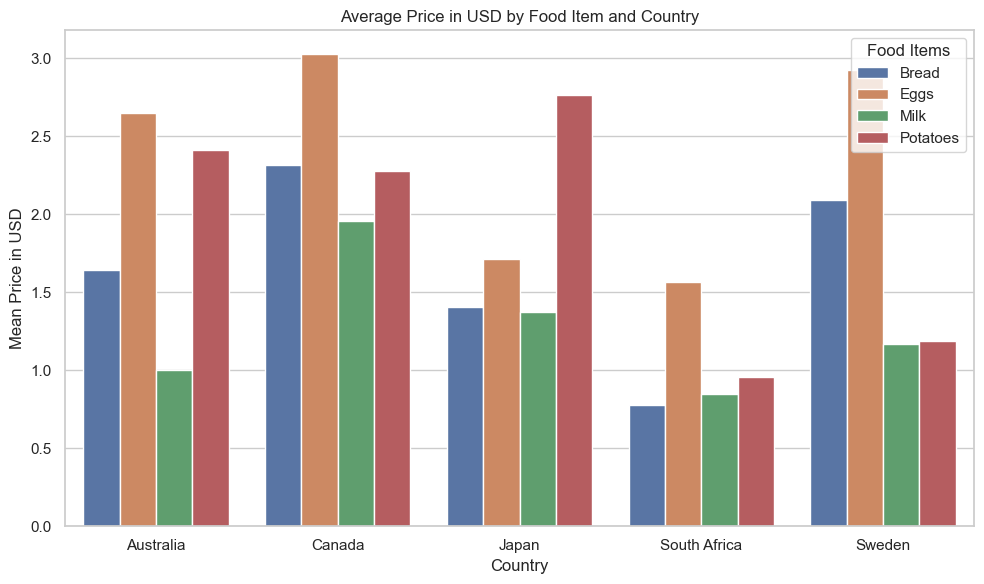

In [11]:
country_mean_plot_data = country_group['Price in USD'].mean().reset_index()
# reset_index() is used since seaborn requires the data to be a column and not index for plotting

plt.figure(figsize=(10, 6))
sns.barplot(data=country_mean_plot_data, x='Country', y='Price in USD', hue='Food Item')

plt.title('Average Price in USD by Food Item and Country')
plt.ylabel('Mean Price in USD')
plt.xlabel('Country')
plt.legend(title='Food Items')
plt.tight_layout()
plt.show()

#### Observations from the table:
- South Africa has the lowest average price for all food items.
- Canada has is the most expensive for all food items, except potatoes, which is the most expensive in Japan.
- In all countries, except Japan, eggs are the most expensive food item.
- Milk is the cheapest food item in all recorded countries.

### Food Price Charts
#### USD prices are used instead of local currencies to normalize data across countries

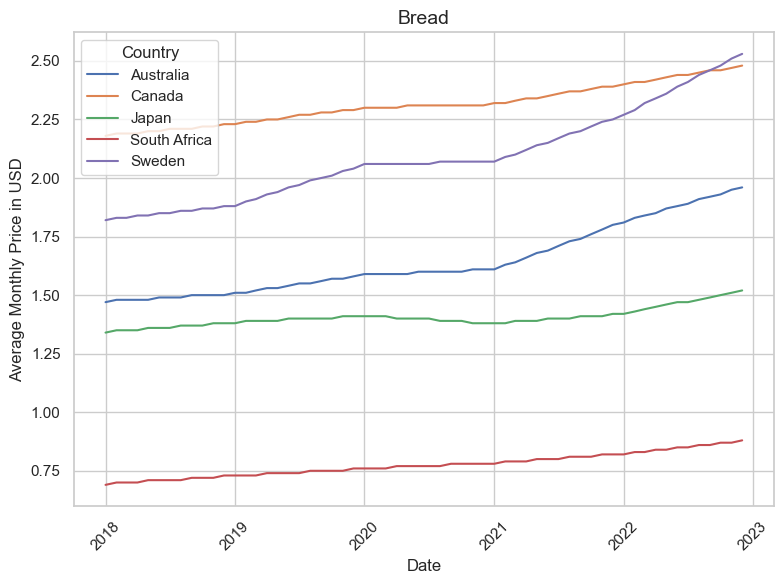

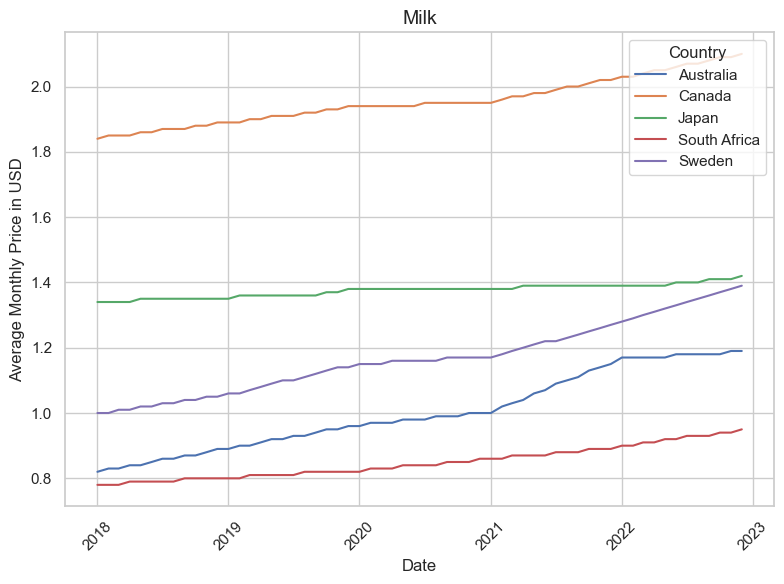

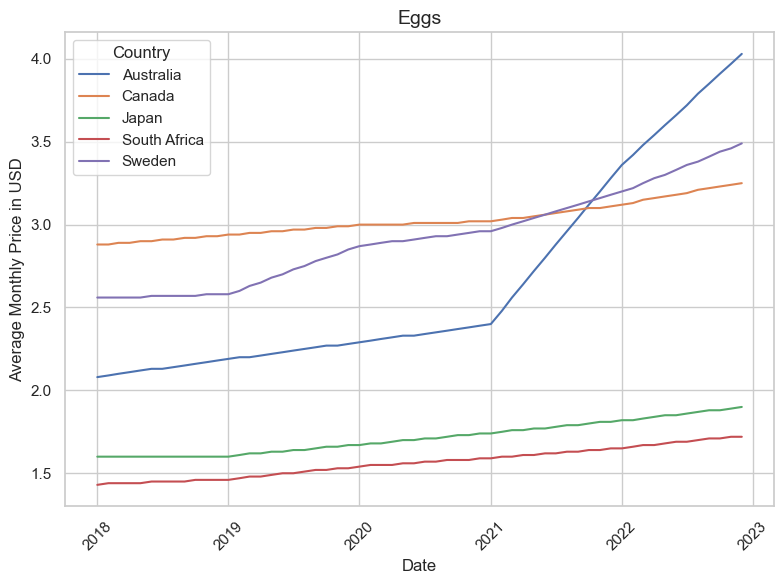

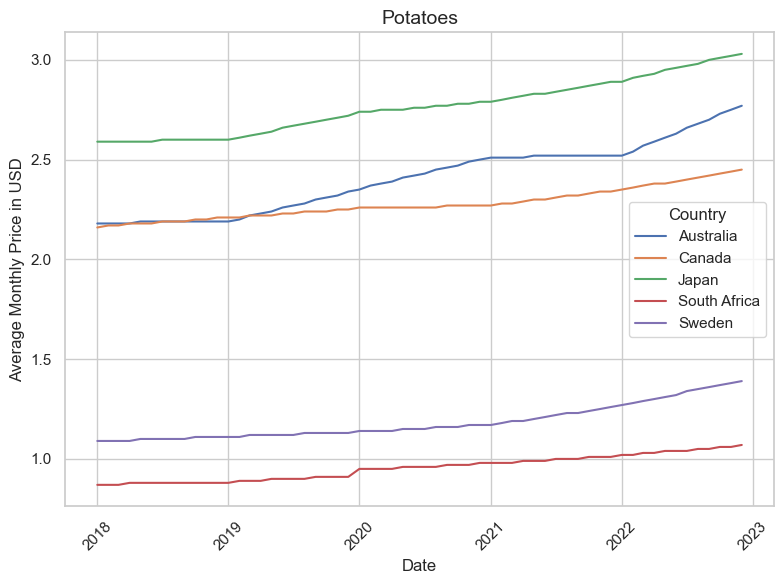

In [12]:
food_items = df['Food Item'].unique()
df.reset_index(inplace=True) # Since seaborn wants date as a column, not index

for item in food_items:
    plt.figure(figsize=(8, 6))
    subset = df[df['Food Item'] == item]
    
    sns.lineplot(data=subset, x='Date', y='Price in USD', hue='Country')
    
    plt.title(f'{item}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Average Monthly Price in USD')
    plt.xticks(rotation=45)
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()


#### Observations from the charts:
- No major change in average food prices is seen in South Africa and Japan -- prices have steadily increased.
- Australia and Canada had similar price for potatoes up until 2019, after which prices increased at a higher rate in Australia and has been up increasing since.
- Egg prices in Australia have sky-rocketed since 2021 -- prices have doubled since then.

### CPI
#### Considering simple mean as the CPI for each country (a more accurate version might be to take the weighted mean based on the usage rates of each item, as done while calculating actual CPI)

In [16]:
monthly_avg = df.groupby(['Country', 'Year', 'Month'])['Price in USD']
# monthly_avg.get_group(('Australia', 2020, 10))
monthly_avg = monthly_avg.mean() # Mean price per month
monthly_avg

Country    Year  Month
Australia  2018  1        1.6375
                 2        1.6450
                 3        1.6475
                 4        1.6525
                 5        1.6575
                           ...  
Sweden     2022  8        2.1300
                 9        2.1475
                 10       2.1650
                 11       2.1825
                 12       2.2000
Name: Price in USD, Length: 300, dtype: float64

In [17]:
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ['country', 'year', 'month', 'avg_price']
monthly_avg_df['date'] = pd.to_datetime(monthly_avg_df[['year', 'month']].assign(day=1))
monthly_avg_df.sort_values(by=['country', 'date'], inplace=True)
monthly_avg_df

,country,year,month,avg_price,date
0,Australia,2018,1,1.6375,2018-01-01
1,Australia,2018,2,1.6450,2018-02-01
2,Australia,2018,3,1.6475,2018-03-01
3,Australia,2018,4,1.6525,2018-04-01
4,Australia,2018,5,1.6575,2018-05-01
...,...,...,...,...,...
295,Sweden,2022,8,2.1300,2022-08-01
296,Sweden,2022,9,2.1475,2022-09-01
297,Sweden,2022,10,2.1650,2022-10-01
298,Sweden,2022,11,2.1825,2022-11-01


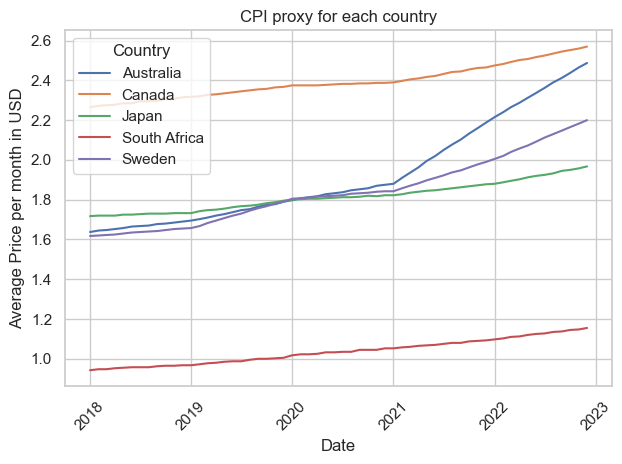

In [18]:
sns.lineplot(data=monthly_avg_df, x='date', y='avg_price', hue='country')
plt.title('CPI proxy for each country')
plt.xlabel('Date')
plt.ylabel('Average Price per month in USD')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

#### Observation:
- An overall increasing trend is seen in all the countries.
- South Africa consistently was the cheapest country for the considered period (2018 - 2023).
- In contrast, Canada was the most expensive.
- Starting in 2018, ordering according to ascending values for CPI proxy was Sweden, Australia, and Japan. The gap shrank up until 2020, when the ordering changed to Japan, Sweden, and Australia. The ordering hasn't changed since.

#### Normalized CPI with base year 2018 = 100 -- helps us observe the relative scale of change in CPI.

In [28]:
base_2018 = monthly_avg_df[monthly_avg_df['year'] == 2018].groupby('country')['avg_price'].mean()
base_2018

country
Australia       1.664583
Canada          2.289583
Japan           1.725833
South Africa    0.956458
Sweden          1.635417
Name: avg_price, dtype: float64

In [29]:
monthly_avg_df['base_2018'] = monthly_avg_df['country'].map(base_2018)
monthly_avg_df

,country,year,month,avg_price,date,base_2018
0,Australia,2018,1,1.6375,2018-01-01,1.664583
1,Australia,2018,2,1.6450,2018-02-01,1.664583
2,Australia,2018,3,1.6475,2018-03-01,1.664583
3,Australia,2018,4,1.6525,2018-04-01,1.664583
4,Australia,2018,5,1.6575,2018-05-01,1.664583
...,...,...,...,...,...,...
295,Sweden,2022,8,2.1300,2022-08-01,1.635417
296,Sweden,2022,9,2.1475,2022-09-01,1.635417
297,Sweden,2022,10,2.1650,2022-10-01,1.635417
298,Sweden,2022,11,2.1825,2022-11-01,1.635417


In [30]:
monthly_avg_df['normalized_cpi'] = monthly_avg_df['avg_price'] / monthly_avg_df['base_2018']
monthly_avg_df

,country,year,month,avg_price,date,base_2018,normalized_cpi
0,Australia,2018,1,1.6375,2018-01-01,1.664583,0.983730
1,Australia,2018,2,1.6450,2018-02-01,1.664583,0.988235
2,Australia,2018,3,1.6475,2018-03-01,1.664583,0.989737
3,Australia,2018,4,1.6525,2018-04-01,1.664583,0.992741
4,Australia,2018,5,1.6575,2018-05-01,1.664583,0.995745
...,...,...,...,...,...,...,...
295,Sweden,2022,8,2.1300,2022-08-01,1.635417,1.302420
296,Sweden,2022,9,2.1475,2022-09-01,1.635417,1.313121
297,Sweden,2022,10,2.1650,2022-10-01,1.635417,1.323822
298,Sweden,2022,11,2.1825,2022-11-01,1.635417,1.334522


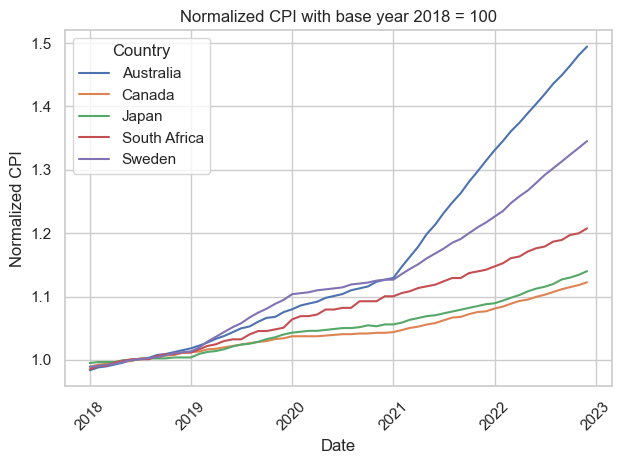

In [31]:
sns.lineplot(data=monthly_avg_df, x='date', y='normalized_cpi', hue='country')
plt.title('Normalized CPI with base year 2018 = 100')
plt.xlabel('Date')
plt.ylabel('Normalized CPI')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

#### Observations:
- Canada, South Africa, and Japan were fairly stable for the period.
- Sweden's rate increased drastically in 2021.
- Australia saw a drastic increase in 2021, following which, it overtook Sweden.